# Homework: Sonar signal classification
In this workshop you will train a binary classification neural network to differentiate if sonar signals bounced against a metal cylinder or a rock.

[Info of the data](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

Goal: Get an accuracy higher than 0.80 in the validation set

## Get the data from Google Drive

In [871]:
# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [872]:
# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [873]:
# Download data
download = drive.CreateFile({'id': '1rw5l3jCo2vlNc8NLrMk3KPZr6HsjNRCY'})
download.GetContentFile('sonar.csv')

In [874]:
ls

sample_data/  sonar.csv


## Do some magic below! ;)

In [875]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [876]:
data = pd.read_csv('sonar.csv')

In [877]:
data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [878]:
import numpy as np
np.random.seed(42)

In [879]:
x_train, y_train = data.drop('R', axis=1), data['R']

In [880]:
x_train.shape, y_train.shape,

((207, 60), (207,))

In [881]:
standard_scaler = StandardScaler()
x_train_scaled = pd.DataFrame(
    standard_scaler.fit_transform(x_train),
    columns=x_train.columns
)

In [882]:
x_train_scaled.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.700189,0.420421,1.052950,0.319501,0.777810,2.600518,1.522475,2.506911,1.324632,0.587392,...,-0.294569,-0.528057,-0.259343,-0.838780,0.014044,1.913786,1.084838,-0.470938,-0.442688,-0.422461
1,-0.130894,0.599427,1.719130,1.167351,0.401466,2.087862,1.967839,2.847551,3.240336,3.058831,...,-1.061350,1.012809,0.832198,-0.194293,1.227682,2.842696,4.150049,1.306561,0.252998,0.254053
2,-0.835792,-0.647546,0.480451,-0.722021,-0.983262,-1.147115,-0.190961,-0.083126,-0.996071,-0.608898,...,0.672242,-0.142840,-1.010664,0.559893,-0.112965,-0.154353,-0.482599,-0.548221,-0.636834,1.030055
3,2.044717,0.854283,0.110929,-0.315311,-0.289998,-0.671681,-0.011196,1.315846,1.516965,1.768058,...,-0.036197,-1.079853,-0.755498,-0.057168,0.239837,-1.170895,-0.099448,-0.486395,0.447143,0.572413
4,-0.026465,0.208041,-0.419933,-0.788730,-0.660939,-0.094732,-0.024152,0.571138,0.280782,0.711633,...,-0.469595,-0.934096,-1.322533,-0.975905,-1.129034,0.126073,-0.360687,-0.810982,-0.458867,-0.064306


In [883]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.values)

In [884]:
y_train_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

## PRIMER MODELO

En este apartado, muestro el modelo que primero realice, obteniendo un score muy por debajo de lo necesario. A partir de este, comencé a tratar de mejorarlo

In [885]:
def create_model():
  model = Sequential([
      Dense(128, input_dim=60, activation='relu'),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1, activation='sigmoid')
    ])
  return model

In [886]:
model = create_model()
model.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_490 (Dense)           (None, 128)               7808      
                                                                 
 dense_491 (Dense)           (None, 64)                8256      
                                                                 
 dense_492 (Dense)           (None, 32)                2080      
                                                                 
 dense_493 (Dense)           (None, 1)                 33        
                                                                 
Total params: 18177 (71.00 KB)
Trainable params: 18177 (71.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [887]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [888]:
history = model.fit(
    x_train_scaled.values,
    y_train_encoded,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
2/2 [==============================] - 2s 174ms/step - loss: 0.7017 - accuracy: 0.4667 - val_loss: 0.6457 - val_accuracy: 0.6667
Epoch 2/10
2/2 [==============================] - 0s 46ms/step - loss: 0.6334 - accuracy: 0.6606 - val_loss: 0.6940 - val_accuracy: 0.4524
Epoch 3/10
2/2 [==============================] - 0s 28ms/step - loss: 0.5841 - accuracy: 0.8061 - val_loss: 0.7437 - val_accuracy: 0.3571
Epoch 4/10
2/2 [==============================] - 0s 27ms/step - loss: 0.5404 - accuracy: 0.8667 - val_loss: 0.7941 - val_accuracy: 0.2619
Epoch 5/10
2/2 [==============================] - 0s 28ms/step - loss: 0.4988 - accuracy: 0.8909 - val_loss: 0.8480 - val_accuracy: 0.2381
Epoch 6/10
2/2 [==============================] - 0s 28ms/step - loss: 0.4604 - accuracy: 0.8970 - val_loss: 0.9083 - val_accuracy: 0.2381
Epoch 7/10
2/2 [==============================] - 0s 28ms/step - loss: 0.4255 - accuracy: 0.9030 - val_loss: 0.9743 - val_accuracy: 0.2381
Epoch 8/10
2/2 [==========

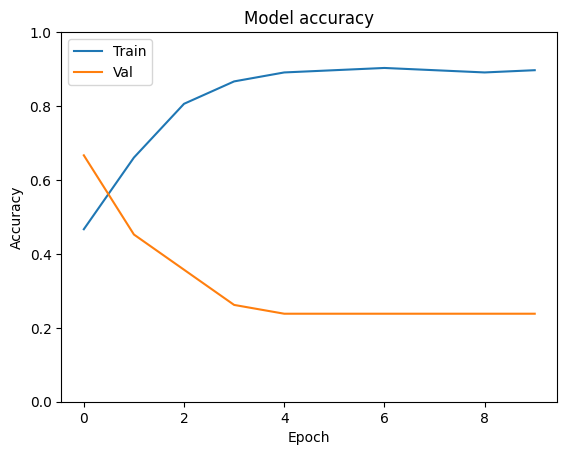

In [889]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

## ULTIMO MODELO > 0.8 VAL_ACCURACY

Las pruebas han sido múltiples, pero por tal de no alargar en exceso e innecesareamente el notebook, muestro únicamente el modelo final

In [890]:
def create_model():
  model = Sequential([
      Dense(512, input_dim=60, activation='relu'),
      Dense(512, activation='relu'),
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dense(128, activation='relu'),
      Dense(128, activation='relu'),
      Dense(64, activation='relu'),
      Dense(64, activation='relu'),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1, activation='sigmoid')
    ])
  return model

In [891]:
model = create_model()
model.summary()

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_494 (Dense)           (None, 512)               31232     
                                                                 
 dense_495 (Dense)           (None, 512)               262656    
                                                                 
 dense_496 (Dense)           (None, 256)               131328    
                                                                 
 dense_497 (Dense)           (None, 128)               32896     
                                                                 
 dense_498 (Dense)           (None, 128)               16512     
                                                                 
 dense_499 (Dense)           (None, 128)               16512     
                                                                 
 dense_500 (Dense)           (None, 64)              

In [892]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [893]:
history = model.fit(
    x_train_scaled.values,
    y_train_encoded,
    epochs=12,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/12
6/6 [==============================] - 3s 51ms/step - loss: 0.6819 - accuracy: 0.6121 - val_loss: 0.7616 - val_accuracy: 0.1905
Epoch 2/12
6/6 [==============================] - 0s 11ms/step - loss: 0.5647 - accuracy: 0.8000 - val_loss: 0.8516 - val_accuracy: 0.4524
Epoch 3/12
6/6 [==============================] - 0s 10ms/step - loss: 0.3033 - accuracy: 0.8909 - val_loss: 3.3136 - val_accuracy: 0.1905
Epoch 4/12
6/6 [==============================] - 0s 11ms/step - loss: 0.3691 - accuracy: 0.8606 - val_loss: 1.3134 - val_accuracy: 0.5238
Epoch 5/12
6/6 [==============================] - 0s 14ms/step - loss: 0.1380 - accuracy: 0.9394 - val_loss: 0.9123 - val_accuracy: 0.6429
Epoch 6/12
6/6 [==============================] - 0s 14ms/step - loss: 0.0929 - accuracy: 0.9758 - val_loss: 2.5295 - val_accuracy: 0.4524
Epoch 7/12
6/6 [==============================] - 0s 13ms/step - loss: 0.0514 - accuracy: 0.9879 - val_loss: 0.4523 - val_accuracy: 0.8333
Epoch 8/12
6/6 [===========

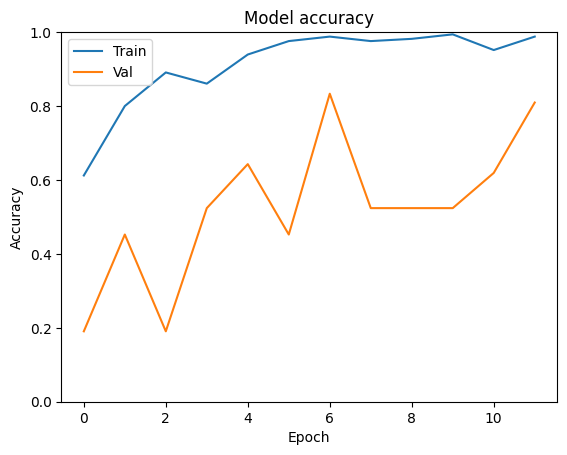

In [894]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

Se ha obtenido un accuracy del set de validacion = 0.8095. 